# Financial Planning with APIs and Simulations

We’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

We’ll use the information from the Monte Carlo simulation to analyze the portfolio in our Jupyter notebook.


In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

We’ll determine the current value of a member’s cryptocurrency wallet. We collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, we’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). 

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19094812,
            "id": 1,
            "last_updated": 1657944816,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 395083492798,
                    "percent_change_1h": -0.0153873459355143,
                    "percent_change_24h": 0.222550845818182,
                    "percent_change_7d": -5.30698154750339,
                    "percentage_change_1h": -0.0153873459355143,
                    "percentage_change_24h": 0.222550845818182,
                    "percentage_change_7d": -5.30698154750339,
                    "price": 20699.0,
                    "volume_24h": 45392614831
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19094812,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119696885,
            "id": 1027,
            "last_updated": 1657944797,
            "max_supply": 119696658,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 145554144374,
                    "percent_change_1h": -0.330628225182644,
                    "percent_change_24h": 1.1510258000044,
                    "percent_change_7d": -1.37939110934447,
                    "percentage_change_1h": -0.330628225182644,
                    "percentage_change_24h": 1.1510258000044,
                    "percentage_change_7d": -1.37939110934447,
                    "price": 1216.5,
                    "volume_24h": 15721872748
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119696885,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

#### Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price

20699.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price


1216.5

### Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"Current value is ${btc_value: 0.2f}")

Current value is $ 24838.80


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price
# Print current value of your holding in ETH
print(f"Current value is ${eth_value: 0.2f}")

Current value is $ 6447.45


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value
# Print current cryptocurrency wallet balance
print(f"Your balance is ${total_crypto_wallet: 0.2f}")

Your balance is $ 31286.25


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

We determine the current value of a member’s stock and bond holdings. Make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion.

#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

#### Set the following parameters for the Alpaca API call:


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]
# Set timeframe to 1Day
timeframe = "1Day"
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
start_date

'2020-08-07T00:00:00-04:00'

#### Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
from alpaca_trade_api.rest import REST, TimeFrame

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# Reorganize the DataFrame
df_portfolio = alpaca.get_bars(tickers, timeframe, start_date, end_date).df
df_portfolio
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()

SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.29  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

#### Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio["AGG"]["close"])
# Print the AGG closing price
agg_close_price

119.43

In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print the SPY closing price
spy_close_price

334.57

#### Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares
# Print the current value of the bond portfolio
print(f"The current value of the AGG shares is ${agg_value:0.2f}")

The current value of the AGG shares is $23886.00


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares
# Print the current value of the stock portfolio
print(f"The current value of the SPY shares is ${spy_value:0.2f}")

The current value of the SPY shares is $36802.70


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value
# Print the current balance of the stock and bond portion of the portfolio
print(f"The current value of the total stock and bond is ${total_stocks_bonds:0.2f}")

The current value of the total stock and bond is $60688.70


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet
# Print current cryptocurrency wallet balance
print(f"The current value of the entire portfolio is ${total_portfolio:0.2f}")

The current value of the entire portfolio is $91974.95


### Evaluate the Emergency Fund

We’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan.

#### Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
savings_data

[31286.25, 60688.7]

#### Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame.

In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stocks/bonds"])
# Display the savings_df DataFrame
savings_df

,amount
crypto,31286.25
stocks/bonds,60688.70


#### Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`.

<AxesSubplot:title={'center':'Portfolio Composition - 2020-08-07'}, ylabel='amount'>

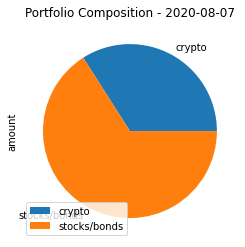

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition - 2020-08-07')

#### Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income.

##### Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000.

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
emergency_fund_value

36000

##### Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulation for having enough funds!")
elif total_portfolio == emergency_fund_value:
    print("Congratulation for reaching the goal!")
else:
    print(f"You are ${emergency_fund_value - total_portfolio} away from reaching your goal.")

Congratulation for having enough funds!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

We’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio.

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics.

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics.

4. Generate the summary statistics for the Monte Carlo simulation.


#### Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The start and end dates should be updated with the information set above
df_port = alpaca.get_bars(tickers, timeframe, start = start, end = end).df
# Reorganize the DataFrame
# Separate ticker data
SPY = df_port[df_port['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_port[df_port['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_port = pd.concat([SPY,AGG], axis=1, keys=['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
display(df_port.head())
display(df_port.tail())

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  247.50  247.87  247.37  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066   
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.87  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.85  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.94  109.6800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-07 04:00:00+00:00  109.67  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79  53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06  41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33  43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288008  328.658804  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250900  329.057593  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935181       39114  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty = MCSimulation(portfolio_data=df_port, weights=[.60,.40], num_simulation=500, num_trading_days=252*30)
# Review the simulation input data
MC_thirty

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Agnes/Desktop/Financial Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997582,0.998134,1.005654,1.001079,0.995238,0.990243,0.997775,1.012248,1.012960,1.010211,...,1.006057,0.992506,0.995663,0.992573,1.016638,0.991814,1.003483,1.004516,1.008335,0.998985
2,0.998405,0.996393,1.007241,1.008539,1.006569,0.979127,0.984869,1.005267,1.019139,1.011240,...,1.011040,1.002048,0.993028,0.996885,1.019746,0.984322,1.011389,0.998727,1.002402,1.003543
3,1.006888,0.999962,1.004429,1.015020,1.007812,0.983782,0.996626,1.013224,1.030039,1.013603,...,1.001285,1.001215,0.981925,1.007239,1.012788,0.979005,0.994532,1.009101,0.998380,1.015152
4,1.011968,1.006955,1.001956,1.014146,1.001032,0.987379,1.001446,1.013224,1.037608,1.017338,...,1.005556,1.011770,0.981582,1.021605,1.006667,0.968892,0.989152,1.015854,0.999096,1.034044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,38.817161,5.979449,6.728049,27.235916,0.985061,12.114301,5.217206,10.548672,9.273895,26.480665,...,16.817269,3.554813,8.185865,31.060098,10.572278,27.294957,16.761047,10.498413,8.000181,16.823132
7557,38.699316,5.996450,6.654093,27.255991,0.981587,12.000189,5.233560,10.463389,9.337854,26.442035,...,16.882931,3.532290,8.244848,30.857012,10.635816,27.556743,16.826037,10.528687,8.115305,16.747354
7558,38.813038,5.997087,6.636748,27.256856,0.999576,12.052613,5.113281,10.435274,9.456205,26.037395,...,16.901024,3.521796,8.226071,30.268557,10.702630,28.100415,16.844278,10.502229,8.124573,16.659243
7559,38.980414,6.009838,6.593680,27.378847,0.998177,12.193155,5.108870,10.471590,9.357998,26.628251,...,17.051219,3.523932,8.116511,30.417548,10.678868,28.076903,16.806520,10.370705,8.194750,16.686366


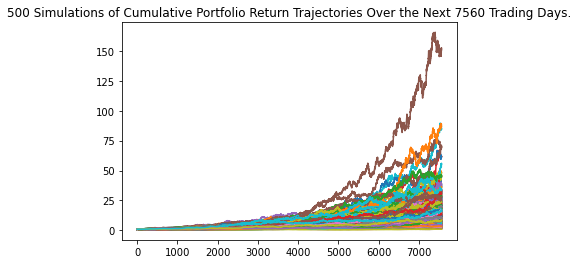

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirty.plot_simulation()

#### Plot the probability distribution of the Monte Carlo simulation.

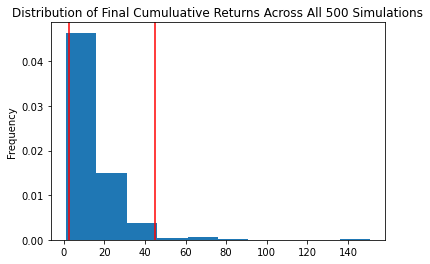

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirty.plot_distribution()

#### Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_sum_stat = MC_thirty.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(thirty_sum_stat)

count           500.000000
mean             14.528913
std              12.835966
min               0.976218
25%               6.667494
50%              10.960925
75%              18.714072
max             150.893377
95% CI Lower      2.511069
95% CI Upper     44.937638
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds = agg_value + spy_value
# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the total stock and bond is ${total_stocks_bonds:0.2f}")

The current balance of the total stock and bond is $60688.70


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = thirty_sum_stat[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = thirty_sum_stat[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investement of ${total_stocks_bonds} in the portfolio"
      f" over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return: 0.2f} and ${ci_upper_thirty_cumulative_return: 0.2f}")

There is a 95% chance that an initial investement of $60688.7 in the portfolio over the next 30 years will end within in the range of $ 152393.53 and $ 2727206.80


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_years = MCSimulation(portfolio_data=df_port, weights=[.80,.20], num_simulation=500, num_trading_days=252*10)

# Review the simulation input data
MC_ten_years

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Agnes/Desktop/Financial Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997412,0.988752,0.987151,1.004336,1.001083,1.020070,0.995654,0.993894,1.007559,1.014773,...,1.024917,0.990383,0.997687,1.002601,1.002029,1.013968,1.009350,0.980101,1.001550,0.994219
2,0.992920,1.013643,0.994289,0.994563,1.005792,1.008665,0.998037,1.000046,1.021839,1.033191,...,1.038301,0.983633,1.009214,1.010998,1.007064,1.007425,1.019582,1.006285,0.985716,0.996425
3,0.991215,1.014337,0.990311,0.989452,1.003232,1.028073,1.006391,0.994487,1.031181,1.031531,...,1.034145,0.995464,1.014783,1.002032,0.993894,0.993556,1.022524,0.978200,0.972268,0.999199
4,0.983945,1.024016,0.987388,0.995217,1.008548,1.032780,1.026819,0.978383,1.029556,1.020803,...,1.041030,1.006214,0.996192,0.996819,0.996640,0.988556,1.017827,0.967820,0.985468,0.985595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.225626,2.188760,5.027196,3.037333,3.035244,4.883910,2.334937,1.752958,1.812799,1.528039,...,2.156551,7.420841,0.943751,1.581008,3.491861,5.654142,2.499863,2.877131,4.709153,3.575735
2517,1.228736,2.177572,4.995629,3.042129,3.024302,4.923938,2.339405,1.763249,1.799502,1.521851,...,2.147711,7.502306,0.949102,1.586976,3.496320,5.710496,2.539058,2.855846,4.821718,3.565979
2518,1.248900,2.180441,4.967472,3.003807,3.031136,5.034239,2.353918,1.772668,1.788407,1.528236,...,2.159692,7.376962,0.952721,1.587132,3.469360,5.831548,2.530000,2.848216,4.908684,3.565941
2519,1.239766,2.131954,4.960476,3.024737,3.062731,4.874028,2.329644,1.773222,1.820939,1.524902,...,2.174359,7.387481,0.963118,1.577894,3.516542,5.885472,2.512888,2.837085,4.872370,3.583842


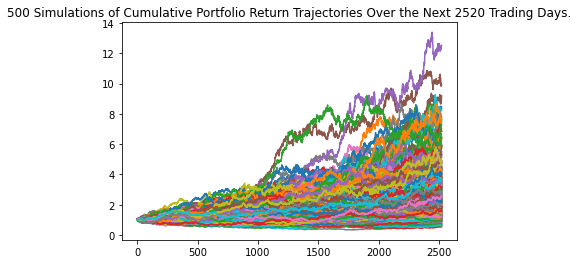

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_line_plot = MC_ten_years.plot_simulation()

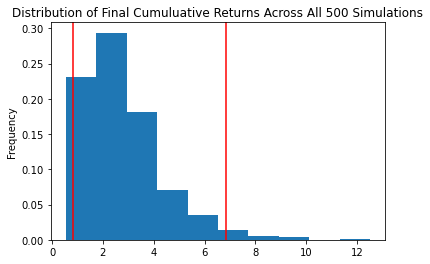

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_dist_plot = MC_ten_years.plot_distribution()

In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_sum_stat = MC_ten_years.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(MC_ten_sum_stat)

count           500.000000
mean              2.765025
std               1.583279
min               0.539298
25%               1.643162
50%               2.358161
75%               3.461231
max              12.516166
95% CI Lower      0.816444
95% CI Upper      6.839885
Name: 2520, dtype: float64


#### Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds = agg_value + spy_value
# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the total stock and bond is ${total_stocks_bonds:0.2f}")

The current balance of the total stock and bond is $60688.70


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_ten_sum_stat[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_ten_sum_stat[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investement of ${total_stocks_bonds} in the portfolio"
      f" over the next 10 years will end within in the range of ${ci_lower_ten_cumulative_return: 0.2f} and ${ci_upper_ten_cumulative_return: 0.2f}")

There is a 95% chance that an initial investement of $60688.7 in the portfolio over the next 10 years will end within in the range of $ 49548.93 and $ 415103.73


#### Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

Based on a 10 year simulation with a weight of 20% bonds and 80% stocks yields a forecasted upside cumulative return of approximately $415,103.

Based on the current value of the portfolio compared to a 30 year forecast, where the upside return is forecast to be as high as $2,727,206.

Ten-year performance is very good, but it looks like the credit union members will have to work a bit longer than they had hoped.